## Handling Imbalance Dataset
        1- Up Sampling
        2- Down Sampling

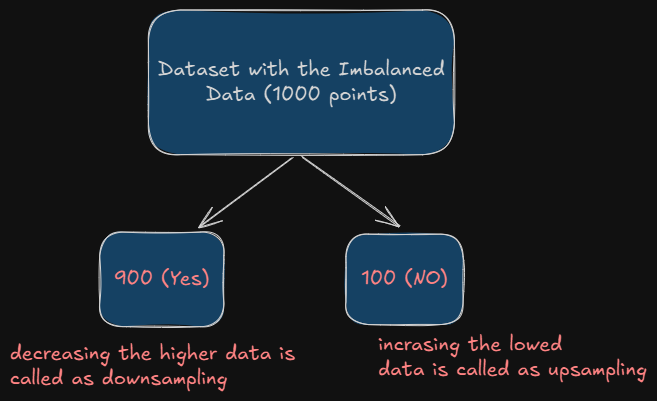
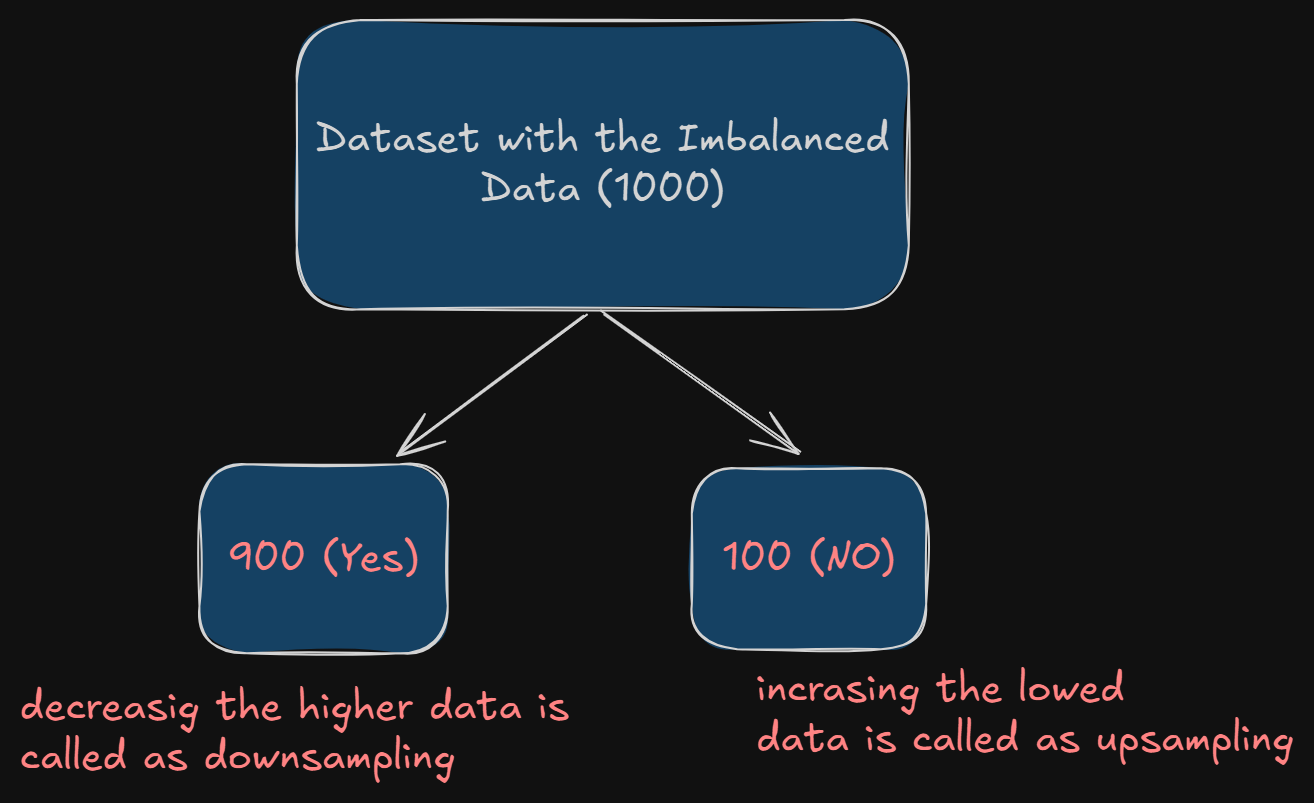

In [53]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# create a dataframe with two classes
n_samples  = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0

In [54]:
print(f"My Imbalance Dataset with class-0 is {n_class_0} and with class-1 is {n_class_1}")
n_class_0, n_class_1

My Imbalance Dataset with class-0 is 900 and with class-1 is 100


(900, 100)

### Creating Imbalance Dataset

In [55]:
class_0 = pd.DataFrame({
        'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
        'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
        'target': [0]*n_class_0
})

class_1 = pd.DataFrame({
        'feature_1': np.random.normal(loc=0, scale=1, size=n_class_1),
        'feature_2': np.random.normal(loc=0, scale=1, size=n_class_1),
        'target': [1]*n_class_1
})

In [56]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [57]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [58]:
df.tail()

,feature_1,feature_2,target
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1
999,0.697490,0.013570,1


In [59]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

#### Upsampling the dataset

In [60]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [61]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, # Sample with replacement
                        n_samples=len(df_majority),
                        random_state=42 )
                        

In [62]:
df_minority_upsampled.shape

(900, 3)

In [63]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [64]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

### DownSampling the dataset

In [65]:
# Set the random seed for reproducibility
np.random.seed(123)

# create a dataframe with two classes
n_samples  = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0

print(f"My Imbalance Dataset with class-0 is {n_class_0} and with class-1 is {n_class_1}")
n_class_0, n_class_1

class_0 = pd.DataFrame({
        'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
        'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
        'target': [0]*n_class_0
})

class_1 = pd.DataFrame({
        'feature_1': np.random.normal(loc=0, scale=1, size=n_class_1),
        'feature_2': np.random.normal(loc=0, scale=1, size=n_class_1),
        'target': [1]*n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
df['target'].value_counts()

My Imbalance Dataset with class-0 is 900 and with class-1 is 100


target
0    900
1    100
Name: count, dtype: int64

In [66]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [67]:

df_majority_downsampled = resample(df_majority, replace=False, # Sample with replacement
                        n_samples=len(df_minority),
                        random_state=42 )
                        

In [68]:
df_majority_downsampled.shape

(100, 3)

In [69]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [70]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

### SMOTE(Synthetic Minority Oversampling Technique)
SMOTE is a technique used in machine learning to address imbalanced dataset where the minority class has significantly fewer instances then majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between instances.

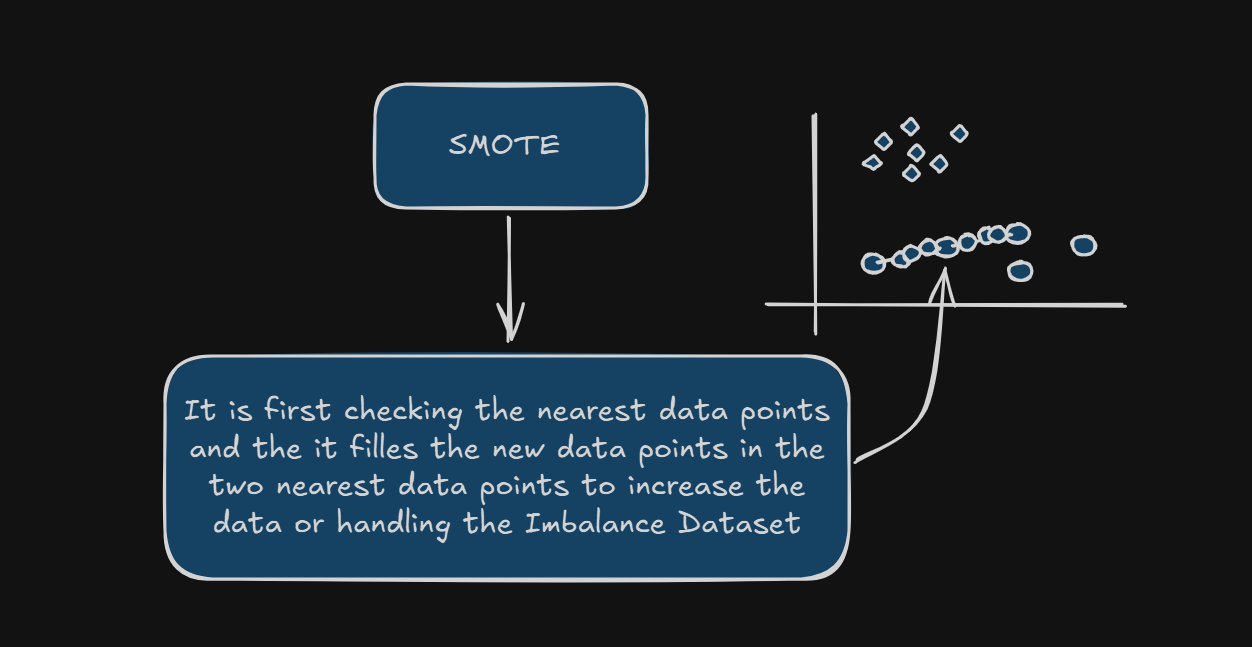

In [71]:
from sklearn.datasets import make_classification

In [72]:
X,y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12)


In [73]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1,df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [74]:
final_df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

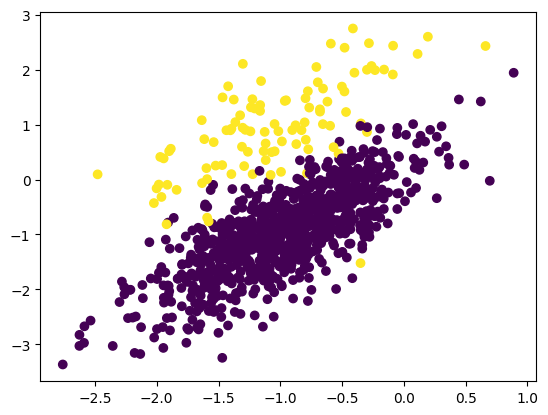

In [75]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [76]:
# !pip install imblearn

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
## Transform the dataset

oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [79]:
X.shape, y.shape

((1800, 2), (1800,))

In [80]:
len(y[y==0]), len(y[y==1])

(900, 900)

In [81]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
oversample_df = pd.concat([df1,df2], axis=1)

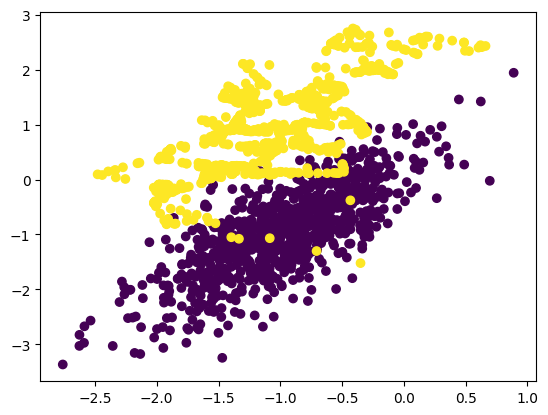

In [82]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c = oversample_df['target'])

The yellow dots are representing the minority data previously now you can see that is the taking the two nearest data points and creating the new data points in between.